In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import joblib

In [ ]:
pip install scikit-learn==1.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
df = pd.read_csv('Weather_Data.csv')
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [ ]:
df_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [ ]:
df_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [ ]:
df_processed.drop('Date',axis=1,inplace=True)


In [ ]:
df_processed = df_processed.astype(float)

In [ ]:
features = df_processed.drop(columns='RainTomorrow', axis=1)
Y = df_processed['RainTomorrow']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

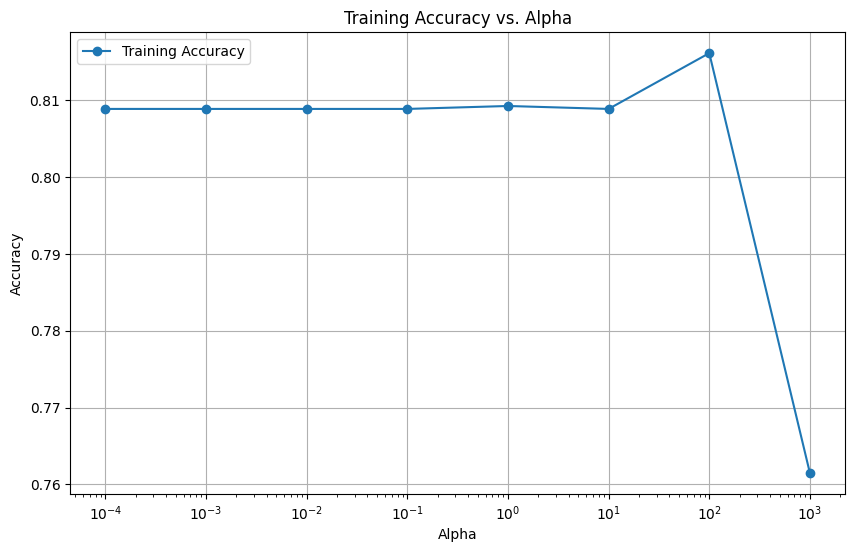

In [ ]:
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_accuracies = []


for alpha in alpha_values:
    clf = MultinomialNB(alpha=alpha, fit_prior=True)
    clf.fit(x_train, y_train)

    y_train_pred = clf.predict(x_train)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))



plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, train_accuracies, marker='o', label='Training Accuracy')

plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Alpha')
plt.grid(True)
plt.legend()
plt.show()
#clf0 = 'clf0.joblib'
#joblib.dump(clf, clf0)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

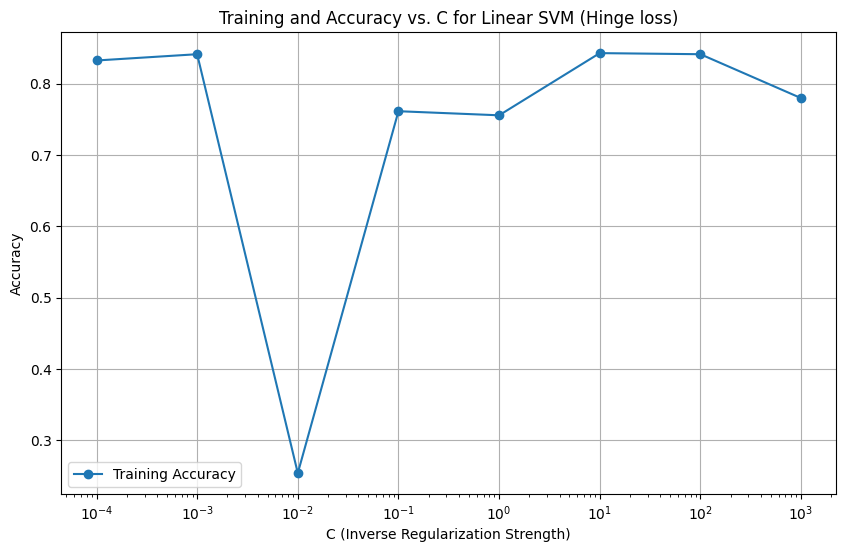

In [ ]:

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,]
train_accuracies = []
validation_accuracies = []

for C in C_values:
    clf = LinearSVC(C=C, loss='hinge', max_iter=10000)
    clf.fit(x_train, y_train)

    y_train_pred = clf.predict(x_train)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))



plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracies, marker='o', label='Training Accuracy')


plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Training and Accuracy vs. C for Linear SVM (Hinge loss)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
optimal_C = 100
clf = LinearSVC(C=optimal_C, loss='hinge', max_iter=10000)
clf.fit(x_train, y_train)


joblib.dump(clf, 'svm_model.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['svm_model.joblib']

In [ ]:
import joblib
import numpy as np
import pandas as pd


svm_model = joblib.load('svm_model.joblib')

def preprocess_input(temp, wind, humidity):

    df = pd.DataFrame(columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                               'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                               'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                               'Temp9am', 'Temp3pm', 'RainToday_No', 'RainToday_Yes', 'WindGustDir_E',
                               'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
                               'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
                               'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW',
                               'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E',
                               'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE',
                               'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S',
                               'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW',
                               'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E',
                               'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
                               'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
                               'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
                               'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW'])


    df.loc[0, 'MinTemp'] = temp
    df.loc[0, 'MaxTemp'] = temp
    df.loc[0, 'Humidity3pm'] = humidity

    # Fill in random values for other features
    for col in df.columns:
        if pd.isnull(df.loc[0, col]):
            df.loc[0, col] = np.random.uniform(0, 1)  

    
    features = df.values

    return features

def predict_with_svm(temp, wind, humidity):
    # Preprocess the input data
    features = preprocess_input(temp, wind, humidity)

    
    prediction = svm_model.predict(features)

    
    return prediction

# Example usage:

min_temp = 25.0  
max_temp = 30.0  
humidity = 60.0  


result = predict_with_svm(min_temp, max_temp, humidity)


print("Prediction:", result)


Prediction: [1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
def interpret_result(result):
    # Convert the prediction result to human-readable format
    return "It will rain tomorrow." if result == 1 else "It will not rain tomorrow."

# Example usage:
# Suppose you have MinTemp, MaxTemp, and Humidity values for testing
min_temp = 30.0  # Example MinTemp value
max_temp = 50.0  # Example MaxTemp value
humidity = 20.0  # Example Humidity value

# Make prediction with SVM model using the provided MinTemp, MaxTemp, and Humidity values
result = predict_with_svm(min_temp, max_temp, humidity)

# Interpret the prediction result
interpretation = interpret_result(result)

# Print the interpretation
print(interpretation)

It will not rain tomorrow.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:

svm_model = joblib.load('svm_model.joblib')

def preprocess_input(temp,wind, humidity):
    
    df = pd.DataFrame(columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                               'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                               'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                               'Temp9am', 'Temp3pm', 'RainToday_No', 'RainToday_Yes', 'WindGustDir_E',
                               'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
                               'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
                               'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW',
                               'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E',
                               'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE',
                               'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S',
                               'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW',
                               'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E',
                               'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
                               'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
                               'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
                               'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW'])

    
    df.loc[0, 'MinTemp'] = temp
    df.loc[0, 'MaxTemp'] = temp
    df.loc[0, 'Humidity3pm'] = humidity
    df.loc[0, 'WindGustDir_ENE'] = wind

    
    for col in df.columns:
        if pd.isnull(df.loc[0, col]):
            df.loc[0, col] = np.random.uniform(0, 1)  

    
    features = df.values

    return features

def predict_with_svm(temp, wind, humidity):
    
    features = preprocess_input(temp, wind, humidity)

    
    prediction = svm_model.predict(features)

    
    return prediction

def interpret_result(result):
    
    return "It will rain tomorrow." if result == 1 else "It will not rain tomorrow."

# Example usage:
# Suppose you have MinTemp, MaxTemp, and Humidity values for testing
min_temp = 200.0   # Example MinTemp value
max_temp = 20.0  # Example MaxTemp value
humidity = 99.0  # Example Humidity value


result = predict_with_svm(min_temp, max_temp, humidity)


interpretation = interpret_result(result)


print(interpretation)

It will not rain tomorrow.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
